In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

#loading protobuf libraries
#cd into 'TensorFlow/models/research'
%cd '/content/drive/MyDrive/Objectdetection/Testing/Tensorflow/models/research'

!protoc object_detection/protos/*.proto --python_out=.

#testing the model

#Loading the saved_model(change the path according to your directory names)
import tensorflow as tf
import time

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL="/content/drive/MyDrive/Objectdetection/Testing/Tensorflow/workspace/training_demo/exported-models/my_model/saved_model"
print('Loading model...', end='')
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap('/content/drive/MyDrive/Objectdetection/Testing/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt',use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)


Mounted at /content/drive
/content/drive/MyDrive/Objectdetection/Testing/Tensorflow/models/research
Loading model...Done!


In [2]:
import cv2
import numpy as np

def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background

def overlay_transparent2(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background


Running inference for /content/drive/MyDrive/Objectdetection/Testing/Testimages/h1.jpeg... 72 9 124 29
176 8 213 30
183 67 228 86
Done
38492.5
[[[ 21  14]]

 [[ 29 155]]

 [[297 159]]

 [[286  21]]]
5623.5
[[[147  31]]

 [[276  32]]

 [[281  73]]

 [[153  74]]]
21700.5
[[[ 36  26]]

 [[284 149]]

 [[ 41 144]]]


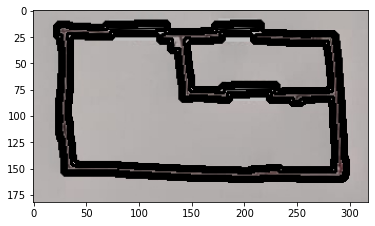

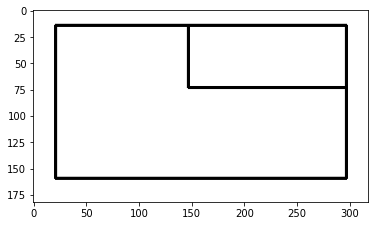

True

In [147]:
import cv2
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#input image
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img=['/content/drive/MyDrive/Objectdetection/Testing/Testimages/h1.jpeg']

#Import image
image = cv2.imread("/content/drive/MyDrive/Objectdetection/Testing/Testimages/h1.jpeg")
objc=[]
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))
for image_path in img:
    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)
    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]
    detections=detect_fn(input_tensor)
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections
    detections['detection_classes']=             detections['detection_classes'].astype(np.int64)
    image_np_with_detections=image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.5,      
          agnostic_mode=False)
    #i=calc_coordinates2(image_path,detections['detection_boxes'],detections['detection_classes'],detections['detection_scores'])
    path=image_path
    boxes=detections['detection_boxes']
    classes=detections['detection_classes']
    score=detections['detection_scores']
    image = cv2.imread(path)
   # cv2_imshow(image)
    index=0
    i=image
    height=image.shape[0]
    width=image.shape[1]
    for sc in range(score.shape[0]):
      if score[sc]>=0.5:
        index+=1
    for box in range(index):
      ymin, xmin, ymax, xmax = tuple(boxes[box])
      YMIN=int (ymin*height)
      YMAX=int (ymax*height)
      XMIN=int (xmin*width)
      XMAX=int (xmax*width)
      start_point = (XMIN,YMAX) 
      end_point = (XMAX,YMIN) 
      color = (255, 0, 0) 
      thickness = 2
      #i = cv2.rectangle(image, start_point, end_point, color, thickness)
     # overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/fig4.png')
      background=image
      if (classes[box]==1):
        overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/w1.png')
      if (classes[box]==2):
        overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/w1.png')
      if (classes[box]==3):
        overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/w1.png')
      if (classes[box]==4):
        overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/w1.png')
      print(XMIN,YMIN,XMAX,YMAX)
      cor=[XMIN,YMIN,XMAX,YMAX]
      objc=np.append(objc,np.array(cor),axis=0)
      x=int(background.shape[0])
      y=int(background.shape[1])
      overlay=cv2.resize(overlay,(XMAX-XMIN,YMAX-YMIN))
      image=overlay_transparent(background,overlay,XMIN,YMIN)
%matplotlib inline
plt.figure()
plt.imshow(image)   
#plt.imshow(image_np_with_detections)
print('Done')
imag=image


import numpy as np
import matplotlib.pyplot as plt
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# read the image
image=imag
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, imgThresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
# show it
#plt.imshow(binary, cmap="gray")
#plt.show()
for i in range(2):
    imgThresh = cv2.dilate(imgThresh,strucEle5x5,iterations = 2)
    imgThresh = cv2.erode(imgThresh,strucEle5x5,iterations = 1)

contours, hierarchy = cv2.findContours(imgThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#image moments to calculate area of the contour
cnt=contours[0]
#M=cv2.moments(cnt)
#print(M)
rc1=[]
rc2=[]
lenc=len(contours)
#area of the contour
for i in range(len(contours)):
    cont=contours[i]
    area=cv2.contourArea(cont)
    #print(area)
    
    epsilon=0.1*cv2.arcLength(cont,True)
    approx=cv2.approxPolyDP(cont, epsilon, True)
    nn,rr,cc=approx.shape
    #print(approx)
    if nn==4:
        rc1=np.append(rc1,np.array(approx[0][0]),axis=0)
        rc2=np.append(rc2,approx[2][0],axis=0)
    elif nn==2:
        rc1=np.append(rc1,np.array(approx[0][0]),axis=0)
        rc2=np.append(rc2,approx[1][0],axis=0)
    else:
        lenc-=1
# draw all contours
image = cv2.drawContours(image,contours,-1, (0,0,0), 2)


strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, imgThresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
# show it
#plt.imshow(binary, cmap="gray")
#plt.show()
for i in range(2):
    imgThresh = cv2.dilate(imgThresh,strucEle5x5,iterations = 2)
    imgThresh = cv2.erode(imgThresh,strucEle5x5,iterations = 1)

contours, hierarchy = cv2.findContours(imgThresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#image moments to calculate area of the contour
cnt=contours[0]
#M=cv2.moments(cnt)
#print(M)
rc1=[]
rc2=[]
lenc=len(contours)
#area of the contour
for i in range(len(contours)):
    cont=contours[i]
    area=cv2.contourArea(cont)
    print(area)
    
    epsilon=0.1*cv2.arcLength(cont,True)
    approx=cv2.approxPolyDP(cont, epsilon, True)
    nn,rr,cc=approx.shape
    print(approx)
    if nn==4:
        rc1=np.append(rc1,np.array(approx[0][0]),axis=0)
        rc2=np.append(rc2,approx[2][0],axis=0)
    elif nn==2:
        rc1=np.append(rc1,np.array(approx[0][0]),axis=0)
        rc2=np.append(rc2,approx[1][0],axis=0)
    elif nn==3:
       rc1=np.append(rc1,np.array(approx[0][0]),axis=0)
       rc2=np.append(rc2,approx[1][0],axis=0)
    else:
        lenc-=1
# draw all contours
image = cv2.drawContours(image,contours,-1, (0,0,0), 3)

plt.imshow(image)
plt.show()

r1=np.empty((lenc,4),int)
r1f=np.empty((lenc,4),int)
j=0
#bring all the coordinates into a single array
for i in range(lenc):
    r1[i][0]=rc1[j]
    r1[i][1]=rc1[j+1]
    r1[i][2]=rc2[j]
    r1[i][3]=rc2[j+1]
    j+=2
r1f=r1
for k in range(4):
    r1=r1[r1[:,k].argsort()] #arrange coordinates in descending order 
   #Merge near by contours to the same location
    for i in range(lenc-1):
        for j in range(4):
            if abs(r1[i][j]-r1[i+1][j])<30 : #if the diff <30 then copy to the nearest
                r1[i+1][j]=r1[i][j]
            else:
                r1[i+1][j]=r1[i+1][j]
            if abs(r1[i][3]-r1[i+1][1])<30 : #if the diff <30 then copy to the nearest
                r1[i+1][1]=r1[i][3]
            else:
                r1[i+1][j]=r1[i+1][j]
            if abs(r1[i][1]-r1[i+1][3])<30 : #if the diff <30 then copy to the nearest
                r1[i+1][3]=r1[i][1]
            else:
                r1[i+1][j]=r1[i+1][j]
            if abs(r1[i][0]-r1[i+1][2])<30 : #if the diff <30 then copy to the nearest
                r1[i+1][2]=r1[i][0]
            else:
                r1[i+1][j]=r1[i+1][j]
            if abs(r1[i][2]-r1[i+1][0])<30 : #if the diff <30 then copy to the nearest
                r1[i+1][0]=r1[i][2]
            else:
                r1[i+1][j]=r1[i+1][j]

row,column=(r1.shape)
im2 = cv2.imread("/content/drive/MyDrive/Objectdetection/Testing/Testimages/white.jpg")#take a white pic to draw rectangles
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
width,height=gray.shape
#white pic has to be same size of input image pic
res = cv2.resize(im2,(height,width), interpolation = cv2.INTER_CUBIC)

#draw rectangle for the obtained coordinates
for i in range(int(row)):
    res=cv2.rectangle(res,(r1[i][0],r1[i][1]),(r1[i][2],r1[i][3]),(0,0,0),2)

plt.imshow(res)
plt.show()

new_res=res
cv2.imwrite('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/outputline.png', res)

72 9 124 29
19.0
6
14
19.0
6
14
176 8 213 30
19.0
6
14
19.0
6
14
183 67 228 86
76.5
76.5
Done


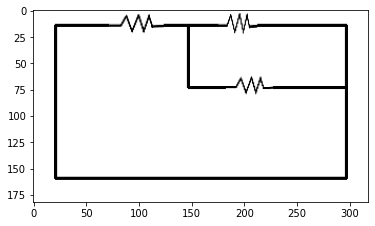

In [148]:
def adjustment(YMAX,YMIN,r1,a,alpha):
    mid=(abs(YMIN+(abs(YMAX)-abs(YMIN))/2))
    print(mid)
    if abs(mid-r1[ij][1])<40:
      a=mid-r1[ij][1]
      alpha=int(YMIN-a)
      print(YMIN-alpha+1)  
      print(r1[ij][1])
    if abs(mid-r1[ij][3])<40:
      a=mid-r1[ij][3] 
     # print(YMIN-a+mid) 
      alpha=int(YMIN-a)
    return alpha



boxes=detections['detection_boxes']
classes=detections['detection_classes']
scores=detections['detection_scores']
index=0
res2=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/outputline.png')
height=res2.shape[0]
width=res2.shape[1]
im33=res2
objc=[]
for sc in range(score.shape[0]):
  if score[sc]>=0.5:
    index+=1
#for box in range(index):
for box in range(index):
  ymin, xmin, ymax, xmax = tuple(boxes[box])
  YMIN=int (ymin*height)
  YMAX=int (ymax*height)
  XMIN=int (xmin*width)
  XMAX=int (xmax*width)
  start_point = (XMIN,YMAX)
  end_point = (XMAX,YMIN) 
  color = (255, 0, 0) 
  #thickness = 2
  #i = cv2.rectangle(image, start_point, end_point, color, thickness)
  #
  overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/outputline.png')
  #backg=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/outputline.png')
  backg=im33
  if (classes[box]==1):
    overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/bat.png')
  if (classes[box]==2):
    overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/res.png')
  if (classes[box]==3):
    overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/cap.png')
  if (classes[box]==4):
    overlay=cv2.imread('/content/drive/MyDrive/Objectdetection/Testing/Testimages/output/res.png')
  print(XMIN,YMIN,XMAX,YMAX)
  cor=[XMIN,YMIN,XMAX,YMAX]
#  print(r1)
  alpha=YMIN
  for ij in range(2):
    a=0
    alpha=adjustment(YMAX,YMIN,r1,a,alpha)
  if alpha <0:
    ss=int(YMIN-a)
    YMIN=YMIN+ss
    YMAX=YMAX-ss
    alpha=YMIN 
    alpha=adjustment(YMAX,YMIN,r1,a,alpha)
  objc=np.append(objc,np.array(cor),axis=0)
  overlay=cv2.resize(overlay,(XMAX-XMIN,YMAX-YMIN))
  im33=overlay_transparent2(backg,overlay,XMIN,alpha)
    #imag=res2
     # del backg
 
#plt.imshow(image_np_with_detections)
print('Done')
%matplotlib inline
plt.figure()
plt.imshow(im33)
plt.show() 